In [1]:
import sys
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import time
from datetime import datetime
from pyproj import Transformer, CRS
from shapely.geometry import Polygon, Point
import h5pyd as h5py
from sliderule import icesat2

In [2]:
# Configure Logging
icesat2_logger = logging.getLogger("sliderule.icesat2")
icesat2_logger.setLevel(logging.INFO)
# Create Console Output
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
icesat2_logger.addHandler(ch)

## SlideRule Configuration

In [3]:
# Configure ICESat-2 API
icesat2.init("http://44.227.4.67:9081", False)
# Configure Region of Interest
region = [ {"lon":-105.82971551223244, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 39.81983728534918} ]

## Execute ATL06 Algorithm using SlideRule

In [4]:
# Latch Start Time
perf_start = time.perf_counter()

# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

# Request ATL06 Data
rsps = icesat2.atl06p(parms, "atl03-cloud")

# Latch Stop Time
perf_stop = time.perf_counter()

# Build Dataframe of SlideRule Responses
df = pd.DataFrame(rsps)

# Display Statistics
perf_duration = perf_stop - perf_start
print("Completed in {:.3f} seconds of wall-clock time". format(perf_duration))
print("Reference Ground Tracks: {}".format(df["rgt"].unique()))
print("Cycles: {}".format(df["cycle"].unique()))
print("Received {} elevations".format(len(df)))

unable to process resource ATL03_20181030213737_04930102_003_01.h5: no elements
Results returned for 1 out of 57 resources
unable to process resource ATL03_20181029095325_04700106_003_01.h5: no elements
Results returned for 2 out of 57 resources
Results returned for 3 out of 57 resources
Results returned for 4 out of 57 resources
unable to process resource ATL03_20190128053323_04700206_003_01.h5: no elements
Results returned for 5 out of 57 resources
Results returned for 6 out of 57 resources
Results returned for 7 out of 57 resources
unable to process resource ATL03_20190129171734_04930202_003_01.h5: no elements
Results returned for 8 out of 57 resources
unable to process resource ATL03_20190202170917_05540202_003_01.h5: no elements
Results returned for 9 out of 57 resources
unable to process resource ATL03_20181231184124_00510202_003_01.h5: no elements
Results returned for 10 out of 57 resources
Results returned for 11 out of 57 resources
unable to process resource ATL03_201903310237

Completed in 1804.560 seconds of wall-clock time
Reference Ground Tracks: [973 554 996  28  51]
Cycles: [1 2 3 4 5 6 7 8 9]
Received 114281 elevations


## Plot Region

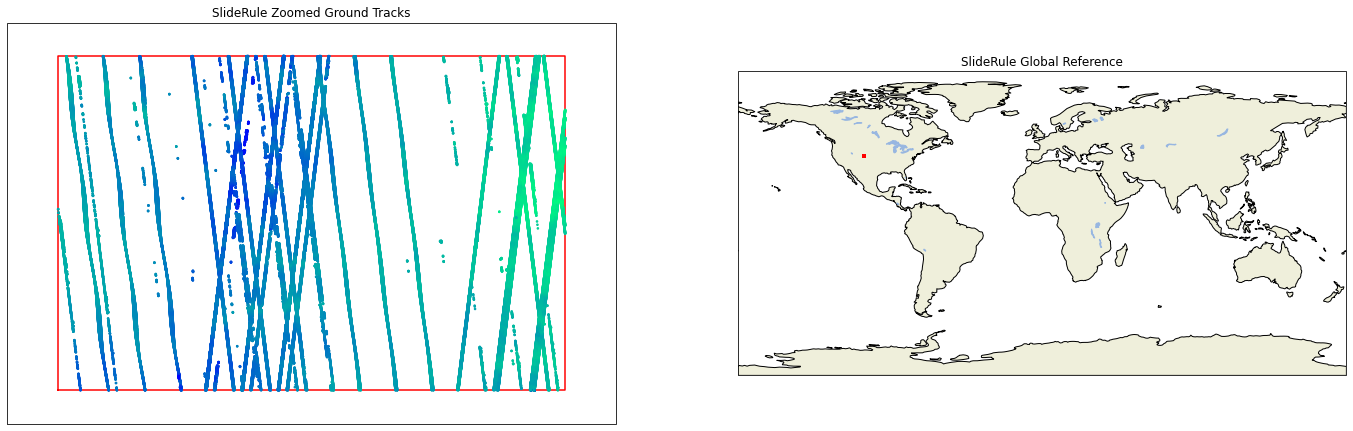

In [5]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1
extent = (min(lons) - lon_margin, max(lons) + lon_margin, min(lats) - lat_margin, max(lats) + lat_margin)

# Create Plot
fig = plt.figure(num=None, figsize=(24, 12))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1 = plt.subplot(121,projection=cartopy.crs.PlateCarree())
ax1.set_title("SlideRule Zoomed Ground Tracks")
ax1.scatter(df["lon"].values, df["lat"].values, s=2.5, c=df["h_mean"], cmap='winter_r', zorder=3, transform=cartopy.crs.PlateCarree())
ax1.set_extent(extent,crs=cartopy.crs.PlateCarree())
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2, transform=cartopy.crs.Geodetic())

# Plot SlideRule Global View
ax2 = plt.subplot(122,projection=cartopy.crs.PlateCarree())
ax2.set_title("SlideRule Global Reference")
ax2.scatter(df["lon"].values, df["lat"].values, s=2.5, color='r', zorder=3, transform=cartopy.crs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax2.add_feature(cartopy.feature.LAKES)
ax2.set_extent((-180,180,-90,90),crs=cartopy.crs.PlateCarree())

# Show Plot
plt.show()